In [3]:
# importing the required libraries


import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from patsy import dmatrices

In [4]:
# reading the data

df = pd.read_csv("IBM Attrition Data.csv")
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


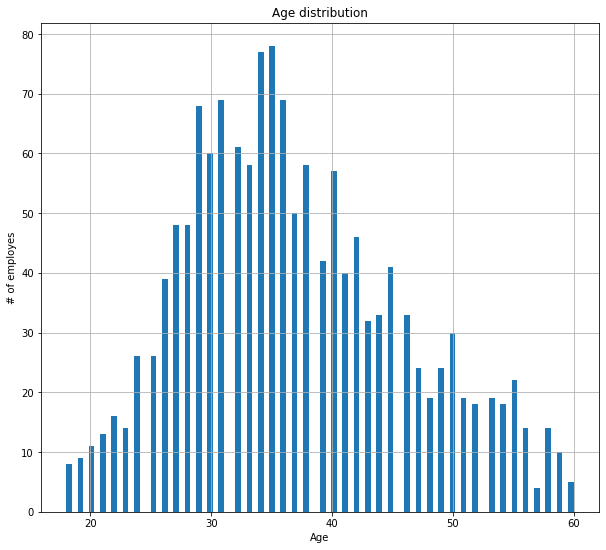

In [5]:
#Finding the age distribution of employees in IBM


plt.figure(figsize=(10,9))
df['Age'].hist(bins=90)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("# of employes")
plt.show()

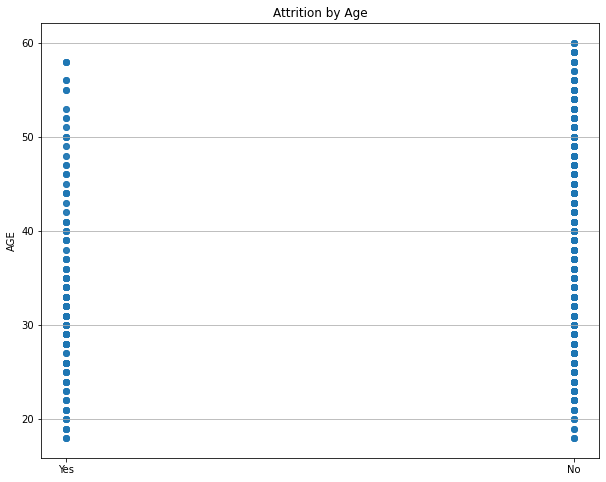

In [6]:
# Exploring attrition by age

plt.figure(figsize=(10,8))
plt.scatter(df.Attrition,df.Age,alpha=.75)
plt.title("Attrition by Age")
plt.ylabel("AGE")
plt.grid(b=True,which='major',axis = 'y')
plt.show()

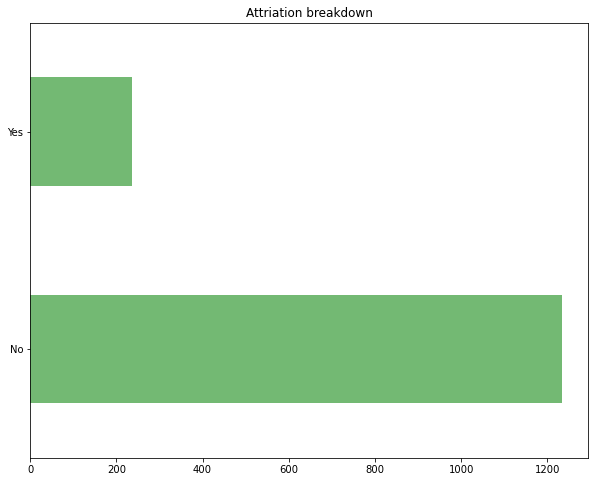

In [11]:

#Explore data for Left employees


plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot(kind = 'barh',color = 'green',alpha=.55)
plt.title("Attriation breakdown")
plt.show()

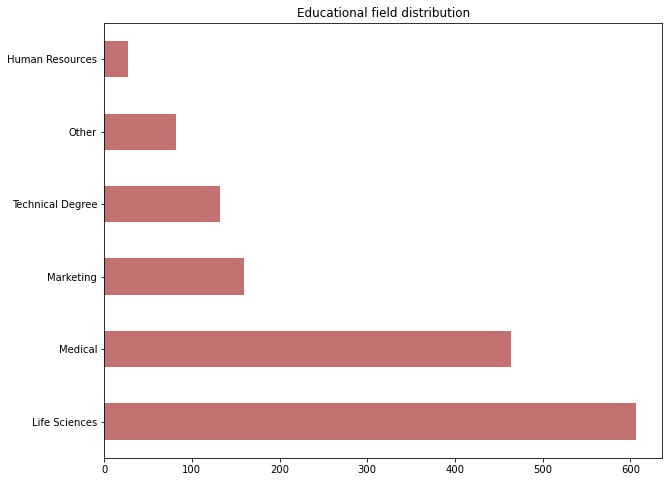

In [12]:
# Finding out the distribution of employees by the education field


plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind = 'barh',color = 'brown',alpha = .67)
plt.title("Educational field distribution")
plt.show()

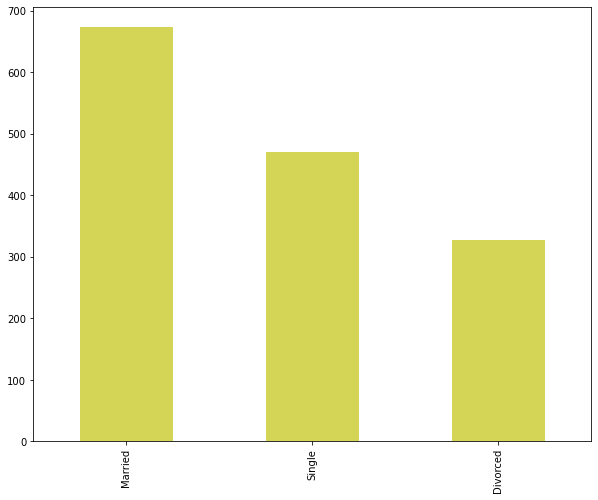

In [13]:
#  A bar chart for the number of married and unmarried employees


plt.figure(figsize=(10,8))
df.MaritalStatus.value_counts().plot(kind = 'bar',color='y',alpha = .66)

In [10]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [15]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [16]:
df.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [17]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [18]:
df.Attrition.dtypes

dtype('O')

In [23]:
df.Attrition.replace('Yes',1,inplace = True)
df.Attrition.replace('No', 2,inplace = True)
df.head(15)


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,2,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,2,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,2,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,2,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,2,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,2,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,2,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,2,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [24]:
df.Attrition.dtypes

dtype('int64')

In [25]:
x = df.drop(['Attrition'],axis = 1)
x.head()
y = df['Attrition']
y.head()

0    1
1    2
2    1
3    2
4    2
Name: Attrition, dtype: int64

In [26]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [28]:
df.EducationField.replace('Life Sciences',1,inplace = True)
df.EducationField.replace('Medical',2,inplace = True)
df.EducationField.replace('Marketing',3,inplace = True)
df.EducationField.replace('Other',4,inplace = True)
df.EducationField.replace('Technical Degree',5,inplace = True)
df.EducationField.replace('Human Resources',6,inplace = True)
df.EducationField.value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [29]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [30]:
df.Department.replace('Research & Development',1,inplace = True)
df.Department.replace('Sales',2,inplace = True)
df.Department.replace('Human Resources',3,inplace = True)
df.Department.value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [31]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [32]:
df.MaritalStatus.replace('Married',1,inplace = True)
df.MaritalStatus.replace('Single',2,inplace = True)
df.MaritalStatus.replace('Divorced',3,inplace = True)
df.MaritalStatus.value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


In [34]:
x = df.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [35]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [37]:
y=df['Attrition']
y.head()

0    1
1    2
2    1
3    2
4    2
Name: Attrition, dtype: int64

In [38]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [39]:
y = np.ravel(y)

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x,y)
 
model.score(x,y)

0.8408163265306122

In [41]:
y.mean()

1.8387755102040817

In [42]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [43]:
predicted= model2.predict(X_test)
print (predicted)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.

In [44]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.13820381 0.86179619]
 [0.19245409 0.80754591]
 [0.25876078 0.74123922]
 [0.1655866  0.8344134 ]
 [0.26500068 0.73499932]
 [0.20902262 0.79097738]
 [0.14384806 0.85615194]
 [0.14300333 0.85699667]
 [0.03300941 0.96699059]
 [0.06314787 0.93685213]
 [0.04900718 0.95099282]
 [0.1689845  0.8310155 ]
 [0.13703442 0.86296558]
 [0.13418806 0.86581194]
 [0.11249393 0.88750607]
 [0.11107384 0.88892616]
 [0.1143027  0.8856973 ]
 [0.21483419 0.78516581]
 [0.2020551  0.7979449 ]
 [0.11488692 0.88511308]
 [0.2934842  0.7065158 ]
 [0.05323304 0.94676696]
 [0.13263747 0.86736253]
 [0.1572355  0.8427645 ]
 [0.39663179 0.60336821]
 [0.18870801 0.81129199]
 [0.08186266 0.91813734]
 [0.06714477 0.93285523]
 [0.3176926  0.6823074 ]
 [0.12972858 0.87027142]
 [0.12733613 0.87266387]
 [0.23031266 0.76968734]
 [0.1356422  0.8643578 ]
 [0.04241116 0.95758884]
 [0.15538512 0.84461488]
 [0.13280652 0.86719348]
 [0.09534014 0.90465986]
 [0.31063581 0.68936419]
 [0.0929638  0.9070362 ]
 [0.19336529 0.80663471]


In [45]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [46]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[  1  69]
 [  0 371]]
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.03        70
         2.0       0.84      1.00      0.91       371

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [47]:
print(X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [48]:
ksp=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(ksp))

[[9.99999374e-01 6.25571966e-07]]
